# Import Libraries

In [27]:
import sys
import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sp 
import sklearn 

import random
import time
import math

In [28]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
%config InlineBackend.figure_format='retina'

In [29]:
data_raw = pd.read_csv(
    "./dataset_diabetes/diabetic_data.csv", keep_default_na=False)
id_map = pd.read_csv("./dataset_diabetes/IDs_mapping.csv")
data = data_raw.copy(True)
data_raw.info()
# data_raw


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [30]:
data_raw

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [31]:
data_raw.describe(include = 'all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## find columns with missing value

In [32]:
data[data=="?"]=np.nan


#* Percentage of missing values in columns that have missing values
(data.isna().mean()* 100)[data.isna().sum()>0]

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
dtype: float64

In [33]:
#data_raw.groupby('payer_code').count()
#data_raw['payer_code'].isn().sum()
#sns.countplot(x='payer_code', data=data_raw)

In [34]:
data_raw.groupby('race').count()
#sns.countplot(x='race', data=data_raw)

,encounter_id,patient_nbr,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
race,,,,,,,,,,,,,,,,,,,,,
?,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,...,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273
AfricanAmerican,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,...,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210
Asian,641,641,641,641,641,641,641,641,641,641,...,641,641,641,641,641,641,641,641,641,641
Caucasian,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,...,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099
Hispanic,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,...,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037
Other,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,...,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506


<Axes: xlabel='weight', ylabel='count'>

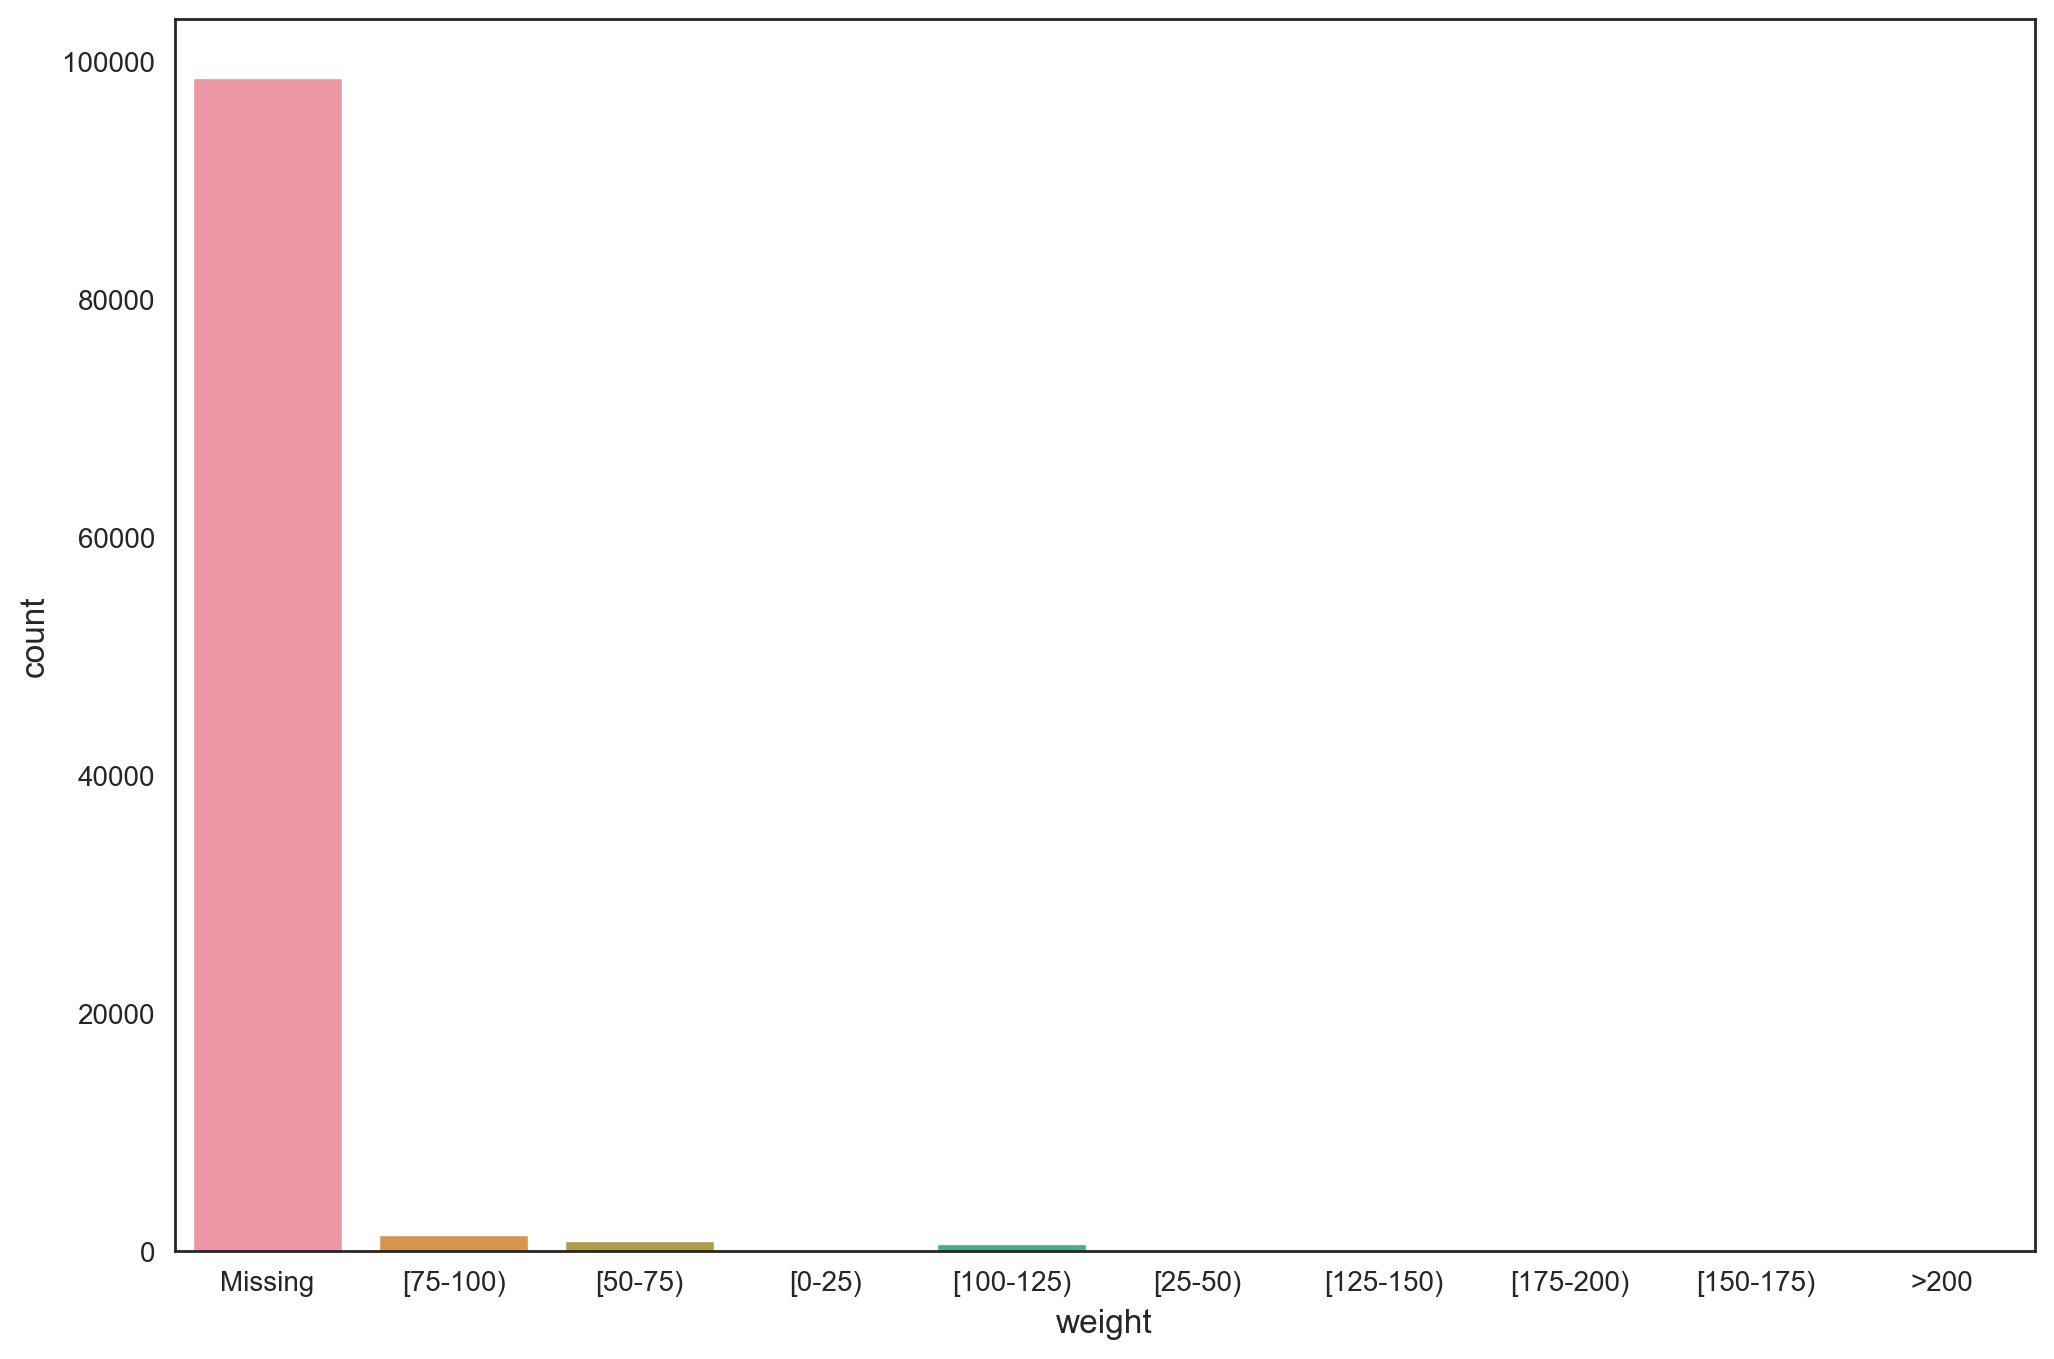

In [35]:
sns.countplot(x='weight', data=data.replace(np.nan, 'Missing', inplace=False))

### 'weight' should be removed

In [36]:
data.drop(columns=['weight'], errors="ignore", inplace=True)

## Filling Missing Values

In [37]:
data['race'].fillna(data['race'].mode()[0], inplace=True)
data['payer_code'].fillna(data['payer_code'].mode()[0], inplace=True)
data['medical_specialty'].fillna(data['medical_specialty'].mode()[0], inplace=True)
data['diag_1'].fillna(data['diag_1'].mode()[0], inplace=True)
data['diag_2'].fillna(data['diag_2'].mode()[0], inplace=True)
data['diag_3'].fillna(data['diag_3'].mode()[0], inplace=True)
(data.isna().mean()* 100)[data.isna().sum()>0]

Series([], dtype: float64)

### Add feature and delete outliers and fix small groups

### --------------------

In [38]:
label = LabelEncoder()
tmp = data.apply (pd.to_numeric, errors='coerce')
nominal_columns = tmp.isnull().any().index[tmp.isnull().any()]
for column in nominal_columns:
    data[column] = label.fit_transform(data[column])
data


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,2,0,0,6,25,1,1,7,...,0,1,1,0,0,0,0,1,0,2
1,149190,55629189,2,0,1,1,1,7,3,7,...,0,3,1,0,0,0,0,0,1,1
2,64410,86047875,0,0,2,1,1,7,2,7,...,0,1,1,0,0,0,0,1,1,2
3,500364,82442376,2,1,3,1,1,7,2,7,...,0,3,1,0,0,0,0,0,1,2
4,16680,42519267,2,1,4,1,1,7,1,7,...,0,2,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,0,1,7,1,3,7,3,7,...,0,0,1,0,0,0,0,0,1,1
101762,443847782,74694222,0,0,8,1,4,5,5,7,...,0,2,1,0,0,0,0,1,1,2
101763,443854148,41088789,2,1,7,1,1,7,1,7,...,0,0,1,0,0,0,0,0,1,2
101764,443857166,31693671,2,0,8,2,3,7,10,7,...,0,3,1,0,0,0,0,0,1,2


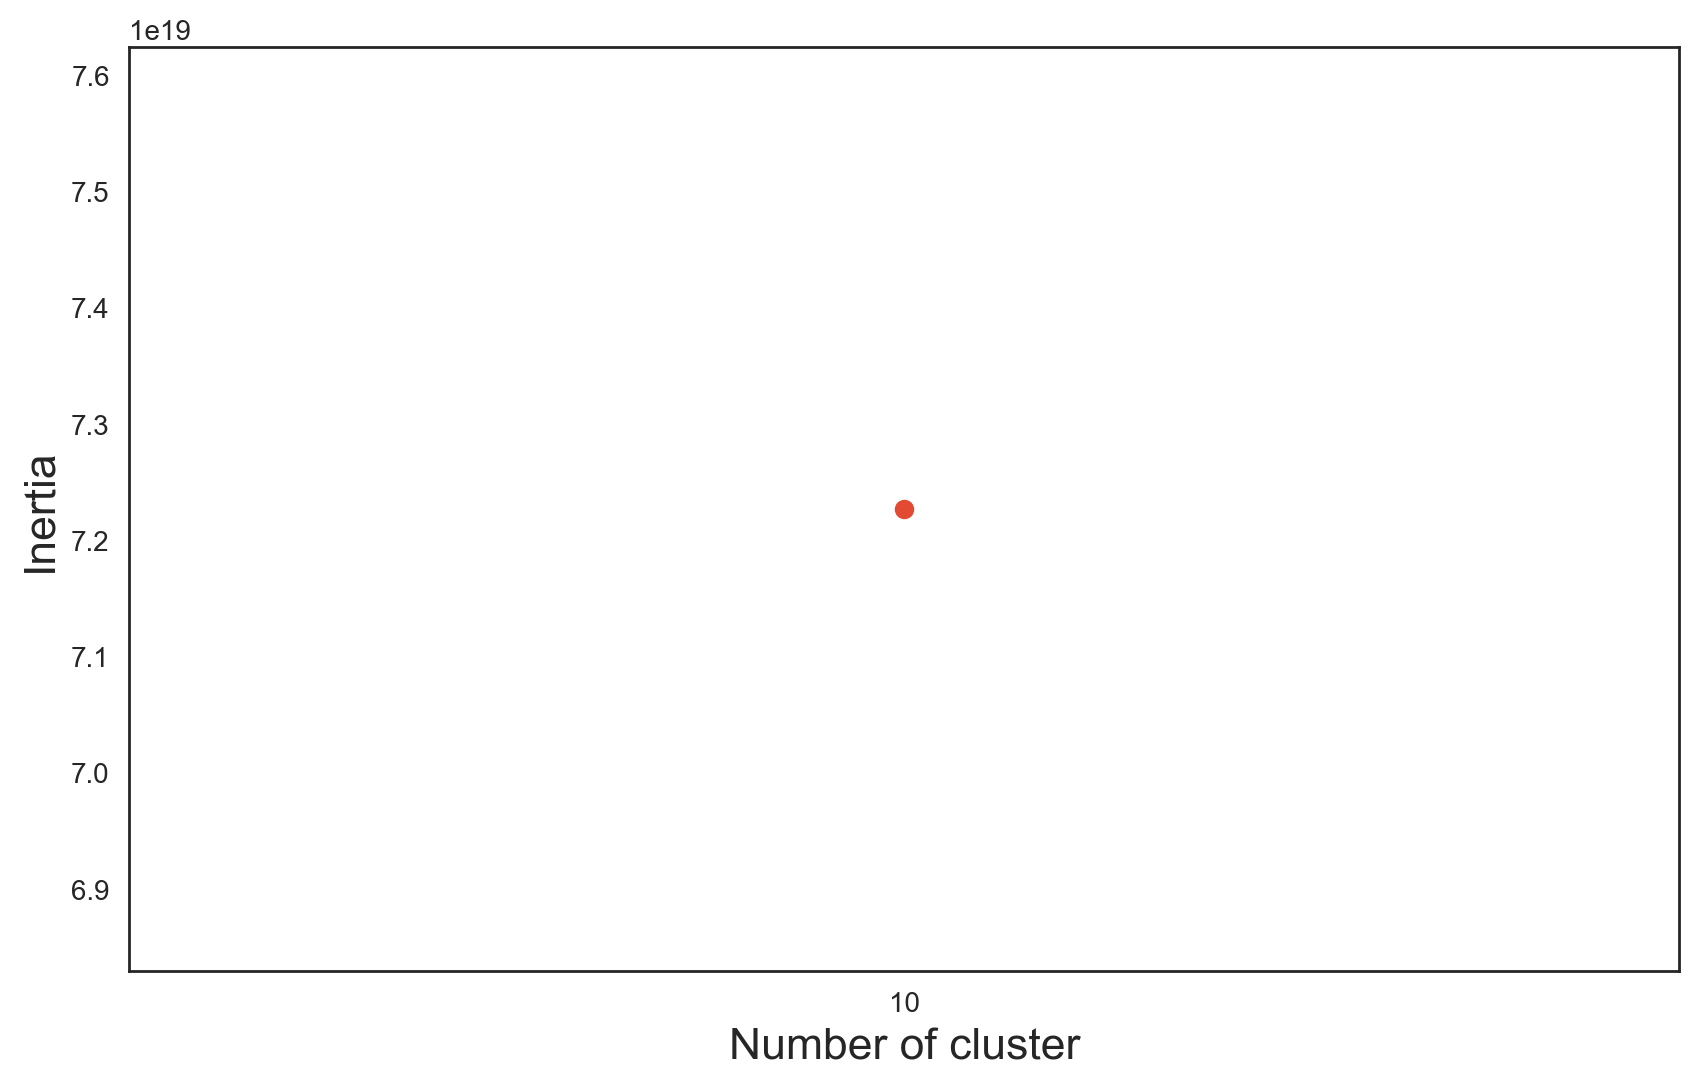

In [39]:

# k = 2

# # Create and fit model
# model = KMeans(n_clusters=k)
# model.fit(data)

# # Get cluster labels
# labels = model.labels_

# # Add labels to DataFrame


# # Evaluate model
inertia = {}
labels = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=123, n_init=10).fit(data)
    inertia[k] = kmeans.inertia_ 
    labels = kmeans.labels_
    #data['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.plot(list(inertia.keys()), list(inertia.values()), marker='o')
plt.xlabel("Number of cluster", fontsize=16)
plt.ylabel("Inertia", fontsize=16)
plt.xticks(list(inertia.keys()))
plt.show()
#print(inertia)

In [45]:
# print(data['cluster'])
precision = precision_score(data['readmitted'], labels, average="weighted")

# Print precision score
print(precision)


0.5162164910830227


In [41]:


X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = KNeighborsClassifier(n_neighbors=int(math.sqrt(len(data)))).fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Add the predictions as a new column to the test set
X_test['pred_knn'] = y_pred

# Print the test set with predictions
print(X_test)

precision = precision_score(
    y_test, y_pred, average='weighted', zero_division=0)
print(precision)

       encounter_id  patient_nbr  race  gender  age  admission_type_id   
26074      86259456       777915     2       1    5                  2  \
73551     217538994     64462554     2       0    8                  1   
51852     154167228    106768719     0       0    3                  1   
67173     188375244     40859721     2       0    8                  3   
1877       12174300      2120220     0       1    6                  2   
...             ...          ...   ...     ...  ...                ...   
23465      80164962       469458     2       0    5                  1   
43234     133429476     97882551     2       0    5                  2   
11854      48755598     41795082     2       0    5                  6   
27794      91092894     23391315     2       0    7                  5   
21645      75263952     20956167     2       0    6                  3   

       discharge_disposition_id  admission_source_id  time_in_hospital   
26074                         1      

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


101766
